# Perform Data cleaning and EDA on dataset. Explore the relationship between variables and identify patterns and trend in data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

## Import Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Check null values percentage

In [4]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Existence of Missing Values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [14]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['HasCabin']=df['Cabin'].notnull().astype(int)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


KeyError: 'Cabin'

## Exploratory Data Analysis (EDA)

### Countplot

0    549
1    342
Name: Survived, dtype: int64

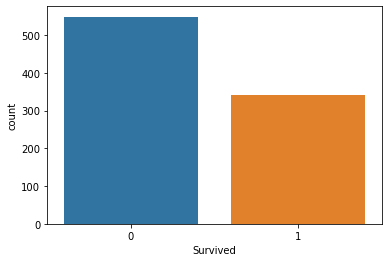

In [15]:
sns.countplot(x='Survived',data = df)
df['Survived'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

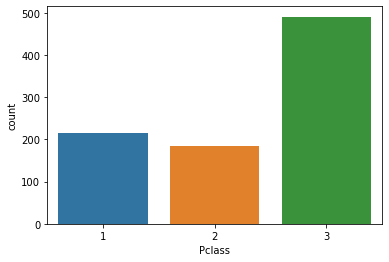

In [16]:
sns.countplot(x='Pclass',data=df)
df['Pclass'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

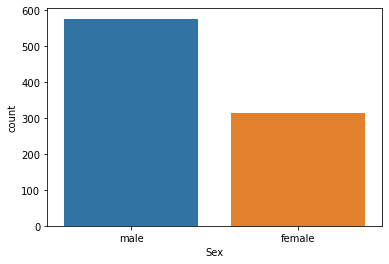

In [17]:
sns.countplot(x='Sex',data=df)
df['Sex'].value_counts()

### Piechart

<AxesSubplot:ylabel='Sex'>

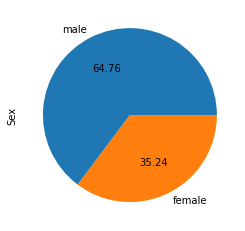

In [18]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='Embarked'>

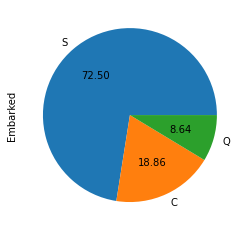

In [19]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

### Histogram

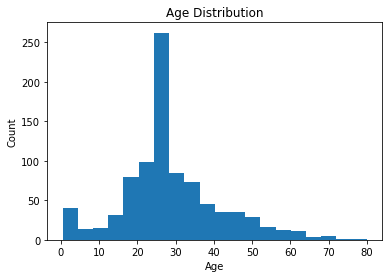

In [21]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

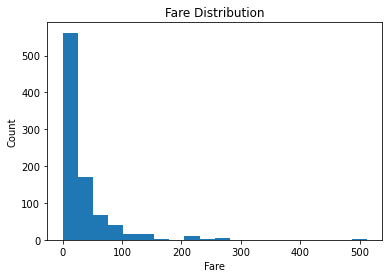

In [22]:
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [23]:
# Exploring the relationship between 'Sex' and 'Survived'
sex_survived = df.groupby('Sex')['Survived'].mean()*100
print(f"Survival Rate by Sex:\n{sex_survived}")


Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


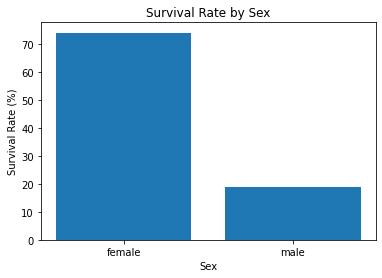

In [24]:
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

### Distplot/Histplot

<AxesSubplot:xlabel='Age', ylabel='Count'>

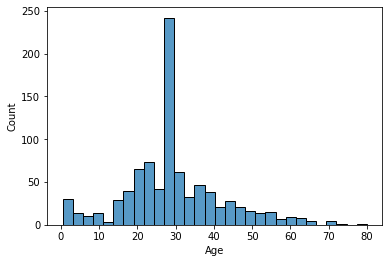

In [25]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

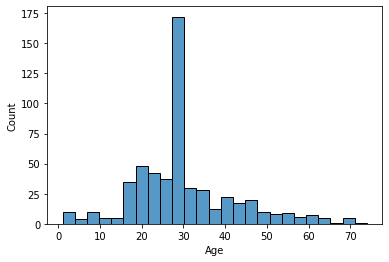

In [32]:
sns.histplot(df[df['Survived']==0]['Age'])

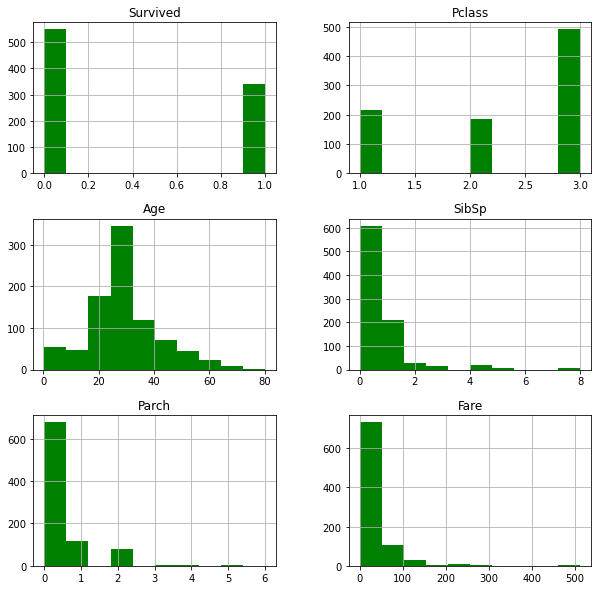

In [29]:
df.hist(figsize=(10,10),color='green')
plt.show()

/Users/madhu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/madhu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

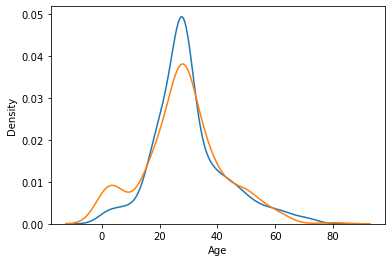

In [34]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False)
sns.distplot(df[df['Survived']==1]['Age'],hist=False)

### Boxplot

/Users/madhu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

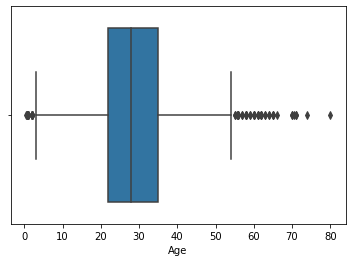

In [30]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

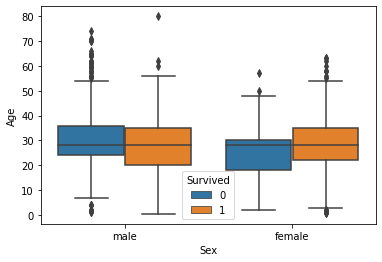

In [31]:
sns.boxplot(x=df['Sex'],y=df['Age'], hue=df['Survived'])

### Pairplot

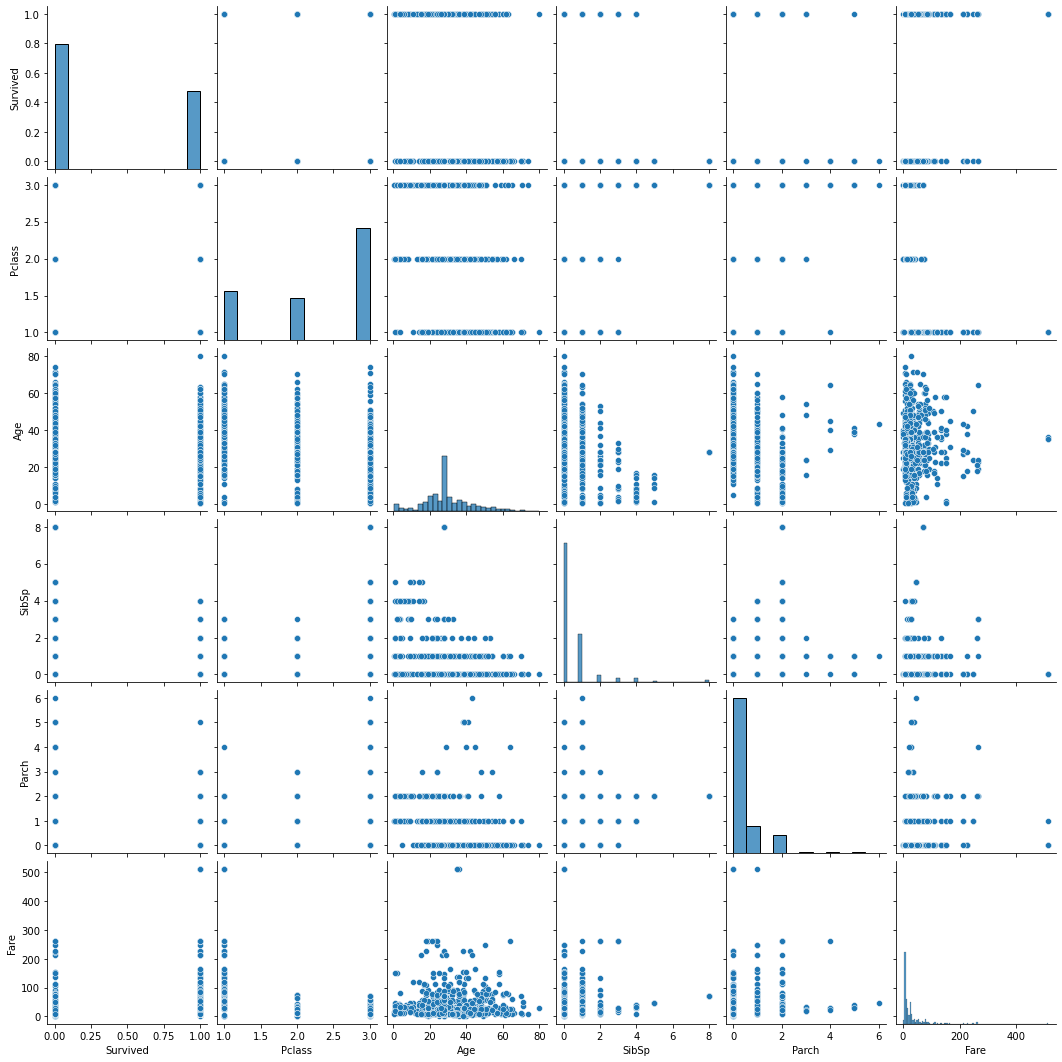

In [35]:
sns.pairplot(df)

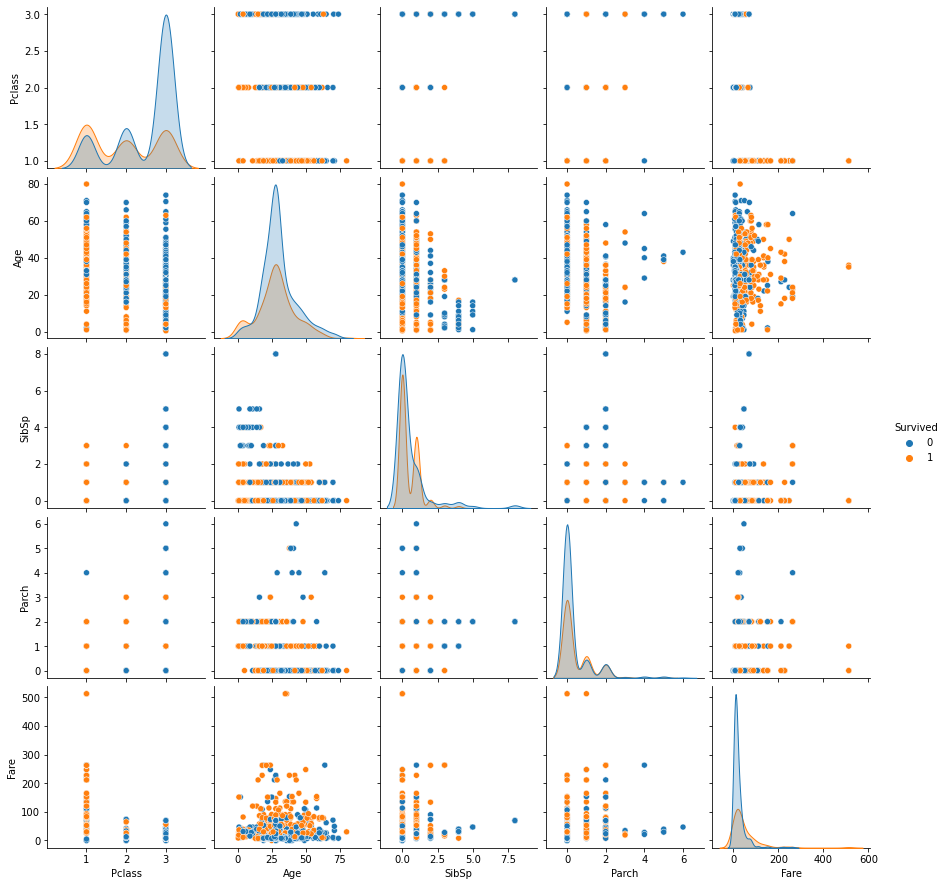

In [36]:
sns.pairplot(df,hue='Survived')